In [89]:
import pandas as pd
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
from plotly.graph_objects import * 
import warnings
from sklearn.metrics import mean_absolute_error, r2_score
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   

from statsmodels.tsa.holtwinters import ExponentialSmoothing

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 10)})
sns.set(font_scale=2)
sns.set_style("whitegrid")
sns.set_context("talk")

Загрузка данных
=====

In [90]:
df = pd.read_csv('../datatest/monthly-car-sales.csv')

In [91]:
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


Создадим серию, у которой в качестве индекса будет Month, а в качестве значений - количество продаж Sales

<AxesSubplot:xlabel='Month'>

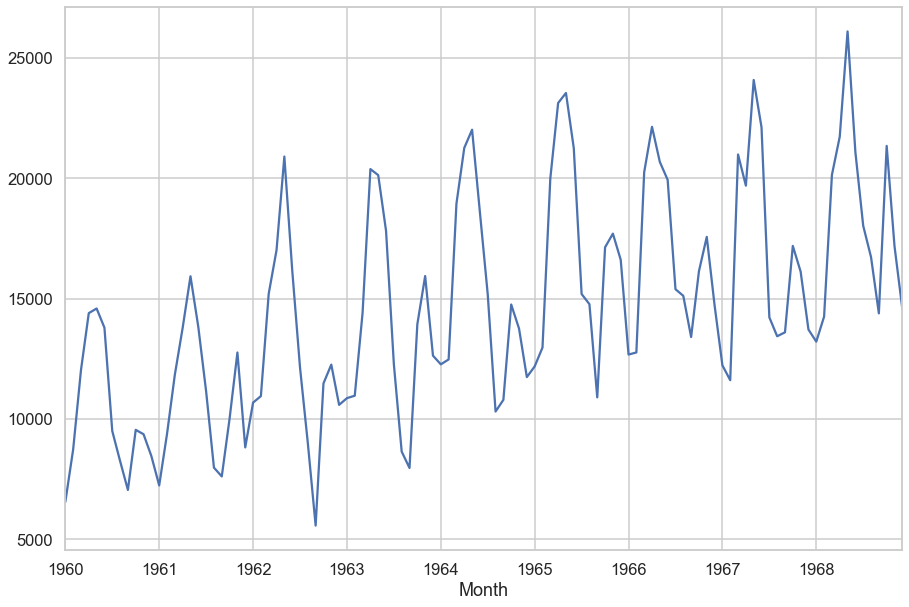

In [92]:
df['Month']=pd.to_datetime(df['Month'])
df.set_index('Month',inplace=True)
s = df['Sales']
s.index.freq = 'MS'
s.plot()

Задание №1
===

Разделить данные на train и test, оставив на test два года

In [93]:
train, test = s[0:-24], s[-24:]

Задание №2
===

* Создать модель <code> SimpleExpSmoothing </code>
* Натренировать ее на train данных
* Сделать предсказания как для train, так и для test
* Выбрать метрики и посчитать качества предсказаний для train и для test
* Построить графики, на которых будут как реальные данные, так и предсказания




In [94]:
mod = SimpleExpSmoothing(train)
mod_fit = mod.fit(optimized=True, use_brute=True, smoothing_level=1/(2*12))
predictions = mod_fit.forecast(len(s))

In [95]:
iplot(Figure(data=[Scatter(x = s.index,
                           y = s.values,
                           name = 'Original'),
                   Scatter(x=s.index,
                           y = predictions,
                           name = 'Simple Exponential Smoothing')]))

In [96]:
r2_score(test, predictions[-24:])

-0.20657430864023762

In [97]:
mean_absolute_error(test, predictions[-24:])

3535.88498267986

Задание №3
===
* Построить модели двойного и тройного экспоненциального сглаживания
* Так же, как и в предыдущем задании, посчитать метрики для train и test
* Построить график

In [98]:
mod2 = ExponentialSmoothing(train, trend='mul')
mod2_fit = mod2.fit()
predictions2 = mod2_fit.forecast(len(s))

In [99]:
iplot(Figure(data=[Scatter(x = s.index,
                           y = s.values,
                           name = 'Original'),
                   Scatter(x=s.index,
                           y = predictions2,
                           name = 'Double Exponential Smoothing')]))

In [100]:
r2_score(test, predictions2[-24:])

-8.98274798227193

In [101]:
mean_absolute_error(test, predictions2[-24:])

11858.783511537395

In [102]:
mod3 = ExponentialSmoothing(train, trend='add', seasonal='mul',seasonal_periods=12)
mod3_fit = mod3.fit()
predictions3 = mod3_fit.forecast(len(s))

In [103]:
iplot(Figure(data=[Scatter(x = s.index,
                           y = s.values,
                           name = 'Original'),
                   Scatter(x=s.index,
                           y = predictions3,
                           name = 'Triple Exponential Smoothing')]))

In [104]:
r2_score(test, predictions3[-24:])

-0.6616625755901016

In [105]:
mean_absolute_error(test, predictions3[-24:])

4461.959257224985

Задание №4
* Выбрать модель с наиболее подходящими параметрами среди предыдущих 
* Сделать цикл кросс-валидации, где размер test равен одному году
* Посчитать среднее значение выбранных метрик

In [106]:
# модель выбрал тройное экспоненциальное сглаживание визуально, так как все модели дают отрицательное значение R2, а абсолютная ошибка простого и тройного сглаживания похожи по значению

In [107]:
len(s)

108

In [108]:
test_size = 12
n_splits = 5
size = len(s)

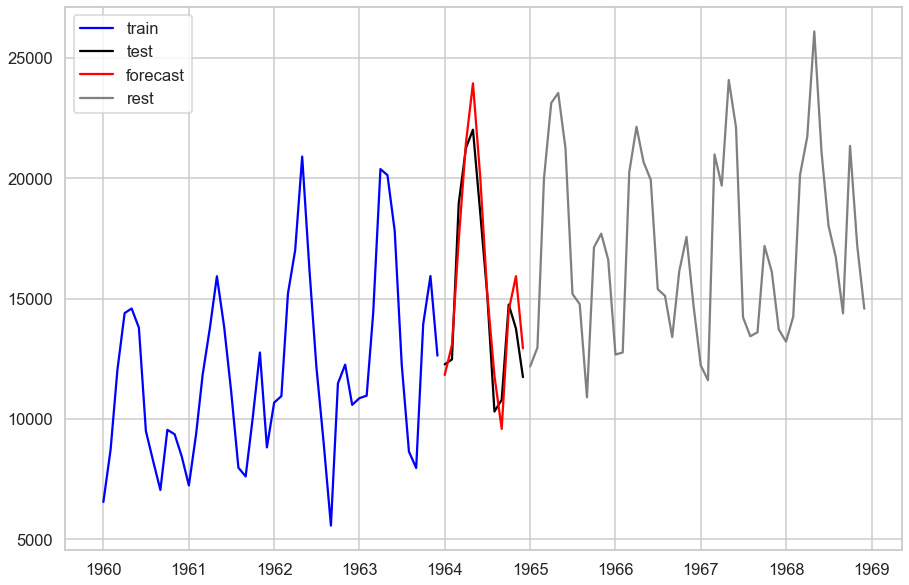

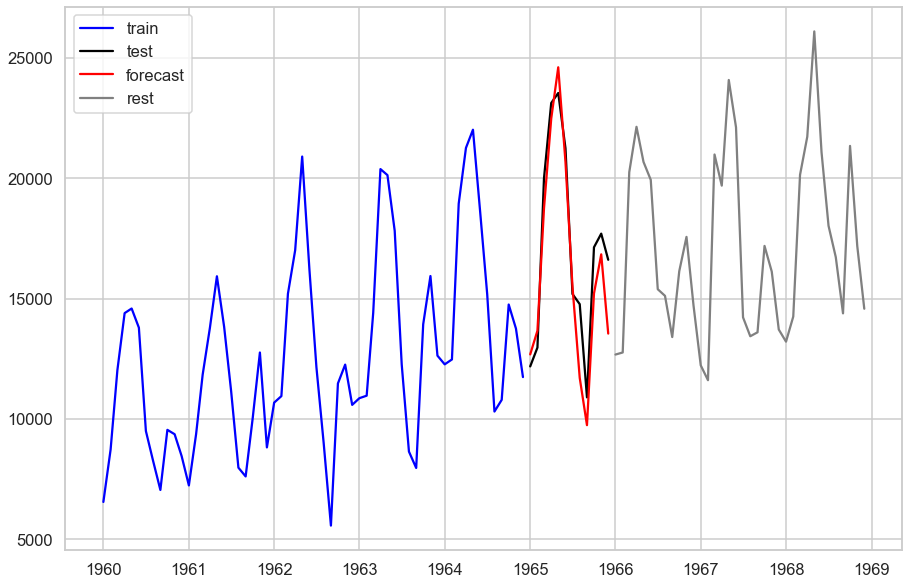

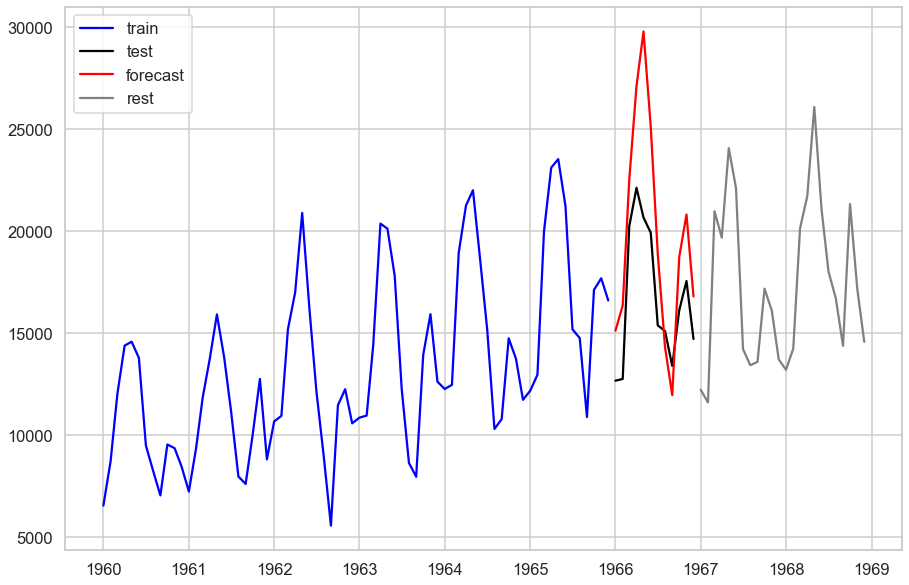

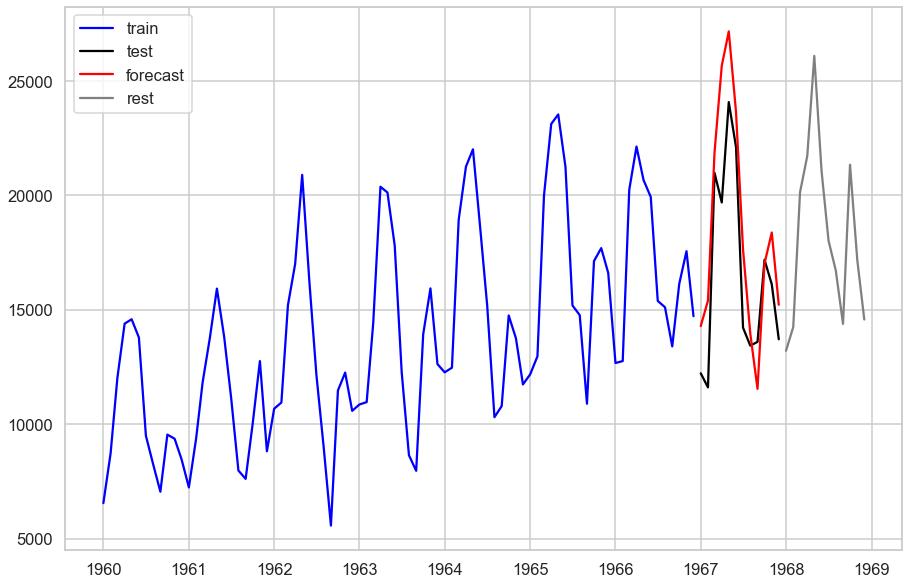

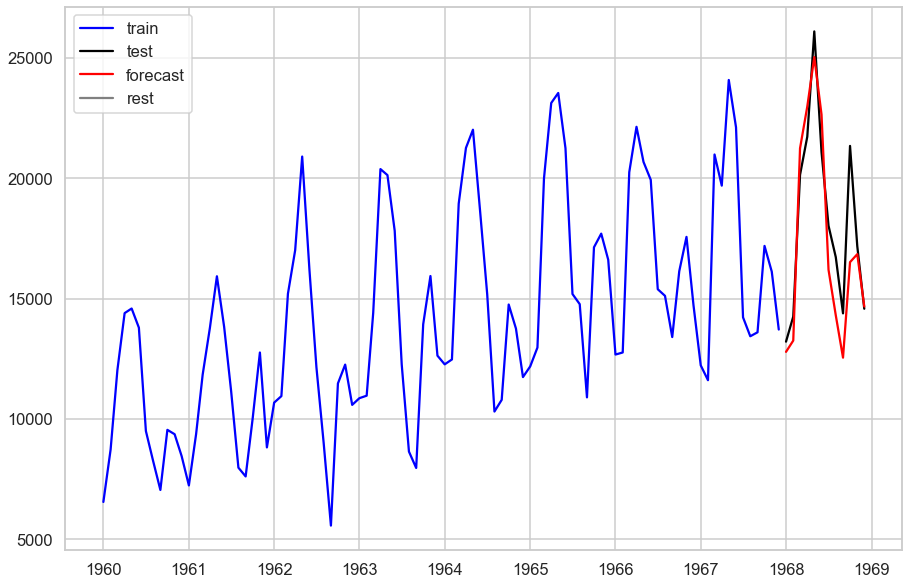

In [109]:
r2_list = list()
for i in reversed(range(n_splits)):
    idx = size - (i+1)*test_size
    train = s[0:idx]
    test = s[idx:idx+test_size]
    rest = s[idx+test_size:]
    model = ExponentialSmoothing(train, trend='add', seasonal='mul',seasonal_periods=12)

    model_fit = model.fit()

    predictions = model_fit.forecast(len(test))

    fig, ax = plt.subplots()
    ax.plot(train, label='train', c = 'blue')
    ax.plot(test, label = 'test', c = 'black')
    ax.plot(predictions, label = 'forecast', c= 'red')
    ax.plot(rest, label = 'rest', c = 'grey')
    ax.legend()
    plt.show()
    r2_list.append(r2_score(test, predictions))

In [110]:
r2_list

[0.8972552543044666,
 0.8505528102547755,
 -0.6327665498238584,
 0.5296543159853241,
 0.7410277689444542]

In [111]:
import numpy as np

In [112]:
np.mean(r2_list)

0.4771447199330324